In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import os

class OneLayerNet(nn.Module):
    def __init__(self, input_size, output_size):
        super(OneLayerNet, self).__init__()
        self.fc = nn.Linear(input_size, output_size,bias=True)
        self.fc.activation=nn.Sigmoid()

    def forward(self, x):
        return self.fc.activation(self.fc(x))
    

# os.chdir(os.path.dirname(__file__))    
# Hyperparameters
input_size=5
output_size=1
num_epochs=100000
learning_rate=0.01

# Get data from data.txt
data=np.loadtxt('Howework 4.data.txt', delimiter=',')
# Convert numpy arrays to torch tensors
x1 = torch.tensor(data[:, 0:1], dtype=torch.float32)
x2 = torch.tensor(data[:, 1:2], dtype=torch.float32)
y=data[:, 2]

x = torch.cat([x1, x2, x1 * x2, x1**2, x2**2], dim=1)
y=torch.tensor(y, dtype=torch.float32).unsqueeze(1)


print(x.data.shape)
print(y.data.shape)

# Create model
model = OneLayerNet(input_size, output_size)
criterion=nn.BCELoss()
optimizer=optim.SGD(model.parameters(), lr=0.01)

for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs=model(x)
    loss=criterion(outputs, y)
    loss.backward()
    optimizer.step()

# Print gradients
print("size of gradient list")
print("Gradient of w0 :",model.fc.bias.grad[0].item())
print("Gradient of w1 :",model.fc.weight.grad[0][0].item())
print("Gradient of w2 :",model.fc.weight.grad[0][1].item())
print("Gradient of w3 :",model.fc.weight.grad[0][2].item())
print("Gradient of w4 :",model.fc.weight.grad[0][3].item())
print("Gradient of w5 :",model.fc.weight.grad[0][4].item())

x1=torch.tensor([[33]], dtype=torch.float32)
x2=torch.tensor([[81]], dtype=torch.float32)
x=torch.cat([x1,x2,x1*x2,x1**2,x2**2], dim=1)
outputs=model(x)
print("class of [33,81] :",outputs.item()>=0.5 and 1 or 0)

torch.Size([100, 5])
torch.Size([100, 1])
size of gradient list
Gradient of w0 : 0.0
Gradient of w1 : 0.0
Gradient of w2 : 0.0
Gradient of w3 : 0.0
Gradient of w4 : 0.0
Gradient of w5 : 0.0
class of [33,81] : 1


In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import os

# Enable CUDA if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

class OneLayerNet(nn.Module):
    def __init__(self, input_size, output_size):
        super(OneLayerNet, self).__init__()
        self.fc = nn.Linear(input_size, output_size,bias=True)
        self.fc.activation=nn.Sigmoid()

    def forward(self, x):
        return self.fc.activation(self.fc(x))
    

# os.chdir(os.path.dirname(__file__))    
# Hyperparameters
input_size=5
output_size=1
num_epochs=100000
learning_rate=0.01

# Get data from data.txt
data=np.loadtxt('Howework 4.data.txt', delimiter=',')
# Convert numpy arrays to torch tensors
x1 = torch.tensor(data[:, 0:1], dtype=torch.float32)
x2 = torch.tensor(data[:, 1:2], dtype=torch.float32)
y=data[:, 2]

x = torch.cat([x1, x2, x1 * x2, x1**2, x2**2], dim=1)
y=torch.tensor(y, dtype=torch.float32).unsqueeze(1)


print(x.data.shape)
print(y.data.shape)

# Create model
model = OneLayerNet(input_size, output_size)
criterion=nn.BCELoss()
optimizer=optim.SGD(model.parameters(), lr=0.01)

for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs=model(x)
    loss=criterion(outputs, y)
    loss.backward()
    optimizer.step()

# Print gradients
print("size of gradient list")
print("Gradient of w0 :",model.fc.bias.grad[0].item())
print("Gradient of w1 :",model.fc.weight.grad[0][0].item())
print("Gradient of w2 :",model.fc.weight.grad[0][1].item())
print("Gradient of w3 :",model.fc.weight.grad[0][2].item())
print("Gradient of w4 :",model.fc.weight.grad[0][3].item())
print("Gradient of w5 :",model.fc.weight.grad[0][4].item())

x1=torch.tensor([[33]], dtype=torch.float32)
x2=torch.tensor([[81]], dtype=torch.float32)
x=torch.cat([x1,x2,x1*x2,x1**2,x2**2], dim=1)
outputs=model(x)
print("class of [33,81] :",outputs.item()>=0.5 and 1 or 0)

Using device: cuda
torch.Size([100, 5])
torch.Size([100, 1])
size of gradient list
Gradient of w0 : -1.4218946020605472e-09
Gradient of w1 : -9.954582047555505e-09
Gradient of w2 : -1.4218946908783892e-08
Gradient of w3 : -9.954581514648453e-08
Gradient of w4 : -6.969394661382466e-08
Gradient of w5 : -1.421894637587684e-07
class of [33,81] : 0


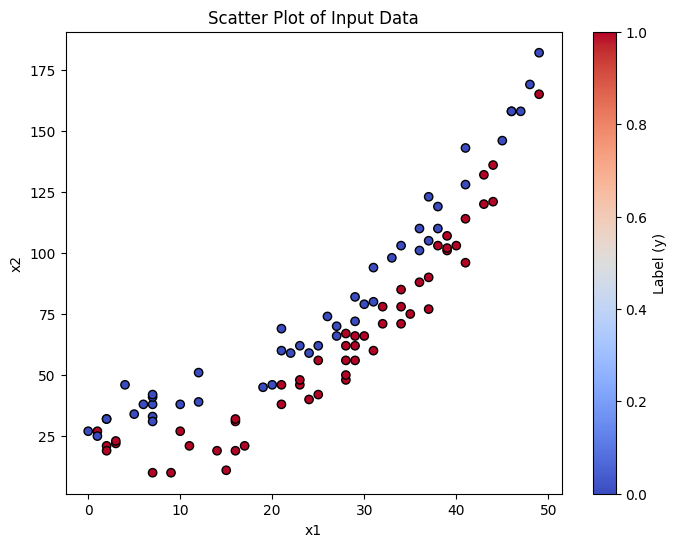

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# # Set working directory if necessary
# os.chdir(os.path.dirname(__file__))

# Load data from file; the file is assumed to have three comma-separated columns: x1, x2, y.
data = np.loadtxt("Howework 4.data.txt", delimiter=",")
x1 = data[:, 0]
x2 = data[:, 1]
y = data[:, 2]

# Create scatter plot
plt.figure(figsize=(8,6))
scatter = plt.scatter(x1, x2, c=y, cmap="coolwarm", edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatter Plot of Input Data")
cbar = plt.colorbar(scatter)
cbar.set_label("Label (y)")
plt.show()
# Save the plot
plt.savefig("scatter_plot.png")
